# Plotting likelihoods

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, chi2, norm, t

## Chi squared distribution
Assuming $S^2$ is the sample variance and $\sigma^2$ is the population variance, $\frac{(n-1)S^2}{\sigma^2}$ belongs to a chi square distribution of $(n-1)$ degrees of freedom.

Visualizing the PDF of a Chi-squared distribution with different degrees of freedom

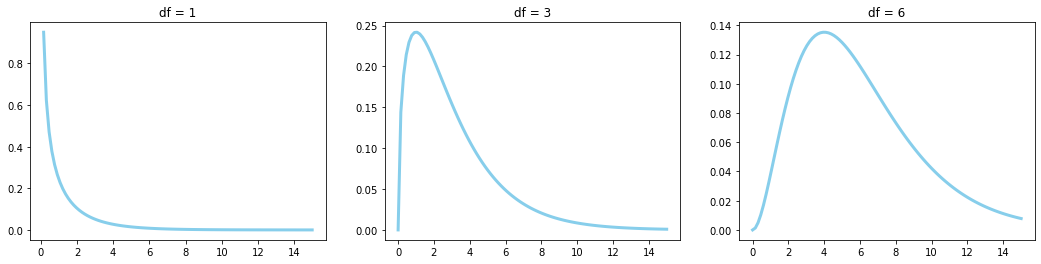

In [2]:
x = np.linspace(0, 15, 100)
df_list = [1, 3, 6]

fig, axs = plt.subplots(1, len(df_list), figsize=(18, 4))

for ax, df in zip(axs, df_list):
    pdf = chi2.pdf(x, df)
    
    ax.plot(x, pdf, color='skyblue', linewidth=3)
    ax.set_title('df = {}'.format(df))
plt.show()

## Variance likelihood

Assumuing $S^2$ is the sample variance of a sample of n random variables from a population with a variance of $\sigma^2$, then:

$ (n-1)S^2 $ belongs to a gamma distribution of shape $\frac{(n-1)}{2}$ and scale $2\sigma^2$.

Applying on the organo-lead example in the lecture:
* Remember that when plotting a likelihood we keep everything computed from the data we have constant and manipulate the distribution parameters. This way, we can observe the likelihood of parameter values given this data. In this case we are manipulating the population standard deviation (or variance). 

In [3]:
n = 513
s2 = 105.977**2
x_bar = 1150.315

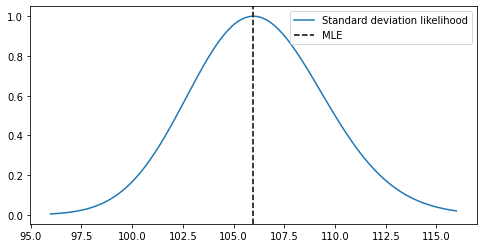

In [4]:
x = (n-1) * s2
sigma_vals = np.linspace(np.sqrt(s2)-10, np.sqrt(s2)+10, 200)
scale = 2*sigma_vals**2
shape = (n-1)/2.

y = gamma.pdf(x, a=shape, scale=scale)
y = y/y.max()

plt.figure(figsize=(8, 4))
plt.plot(sigma_vals, y, label='Standard deviation likelihood')
plt.axvline(x=105.977, color='black', linestyle='--', label='MLE')
plt.legend()
plt.show()

## Gaussian Mean and Variance Likelihoods
Plotting the likelihood of the mean and variance of a Gaussian distribution ([See this article](https://www.statlect.com/fundamentals-of-statistics/normal-distribution-maximum-likelihood))

**Likelihood function:**

Assuming that the random variables are Gaussian iids, the likelihood would be (Multiplying the pdf of all RVs):
$$
L(\mu, \sigma | X) = \prod_{i=1}^{n} \frac{1}{\sqrt{2 \pi \sigma^2}} \cdot exp \left(-\frac{(x_i-\mu)^2}{2\sigma^2} \right) =  
\frac{1}{\left(\sqrt{2 \pi \sigma^2}\right)^n} \cdot exp \left( \sum_{i=1}^{n}-\frac{(x_i - \mu)^2}{2\sigma^2} \right)
$$

In [5]:
def L_gauss(x, mu, var):
    n = len(x)
    exp_power = np.sum(-(x-mu)**2 / (2*var))
    return np.sqrt(2*np.pi*var)**(-n) * np.exp(exp_power)

Sample mean = 4.966
Sample Variance = 2.892


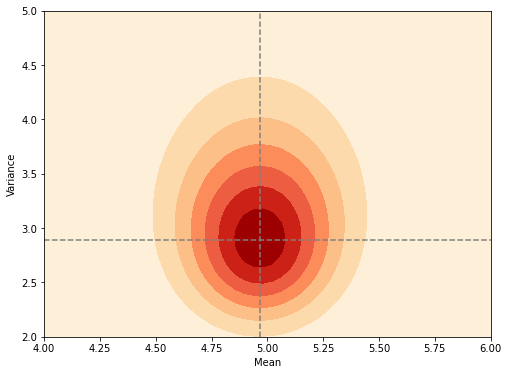

In [7]:
pop_mu = 5
pop_var = 3
sample = np.random.normal(loc=pop_mu, scale=np.sqrt(pop_var), size=50)

x_bar = sample.mean()
s2 = sample.var()

# Number of points for the likelihood plot
n = 50
var_axis = np.linspace(pop_var-1, pop_var+2, n)
mu_axis = np.linspace(pop_mu-1, pop_mu+1, n)
z = np.zeros(shape = (n, n))
x, y = np.meshgrid(mu_axis, var_axis)
x = x.T
y = y.T

for i, mu in enumerate(mu_axis):
    for j, var in enumerate(var_axis):
        z[i, j] = L_gauss(sample, mu, var)

z = z / z.max()

print('Sample mean = {:.3f}'.format(x_bar))
print('Sample Variance = {:.3f}'.format(s2))

# Plotting the likelihood

# Uncomment this part to plot the 3D likelihood plot
# %matplotlib notebook
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.scatter(x, y, z)

fig, ax = plt.subplots(figsize=(8, 6))
ax.contourf(x, y, z, cmap='OrRd')

ax.axhline(y=s2, color='gray', linestyle='--')
ax.axvline(x=x_bar, color='gray', linestyle='--')
ax.set_xlabel('Mean')
ax.set_ylabel('Variance')
plt.show()

Notice that the likelihood distribution is positively skewed in the variance direction as variance values cannot be less than zero. Moreover, the variance likelihood follows a Gamma distribution as mentioned earlier. Gamma distributions are defined between 0 and $\infty$ (See Gamma distribution on [Wikipedia](https://en.wikipedia.org/wiki/Gamma_distribution)).

In [8]:
%matplotlib inline

### Profile likelihoods
A profile likelihood can be thought of as the shadow of a multivariate likelihood when placing a light on the multivariate likelihood. (See the lecture for more details).

#### Mean profile likelihood

The maximum likelihood estimation of the mean is:
$$ MLE(\mu) = \bar{X} $$

The maximum likelihood estimation of the variance is:
$$ MLE(\sigma^2) = \frac{\sum_1^n (x_i - \mu_0)^2}{n} $$
for a fixed value of $\mu_0$

By substituting the maximum likelihood estimation of the variance in the gaussian likelihood function we get (ignoring the constants):
$$ L(\mu_0: X, \sigma^2_{MLE}) \space \alpha \space \left(\frac{\sum_1^n (x_i - \mu_0)^2}{n}\right) ^{-n/2} e^{-n/2} $$
for a range of $\mu_0$ values. (The term in the exponent reduces to $n/2$ after substituting the MLE of the variance)

Mean profile likelihood

Sample mean = 4.966


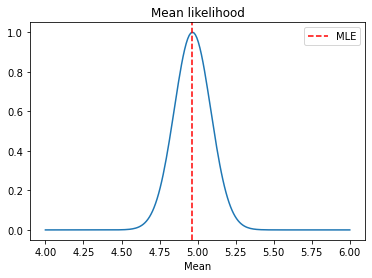

In [9]:
n = 200
mu_vals = np.linspace(pop_mu-1, pop_mu+1, n)
y = np.zeros(n)

for i, mu in enumerate(mu_vals):
    y[i] = (np.sum((sample - mu)**2) / n)**(-n/2.) * np.exp(-n/2.)

y = y / ((np.sum((sample - x_bar)**2)/n)**(-n/2.) * np.exp(-n/2.))

print('Sample mean = {:.3f}'.format(x_bar))

plt.plot(mu_vals, y)
plt.axvline(x=x_bar, color='red', linestyle='--', label='MLE')
plt.xlabel('Mean')
plt.title('Mean likelihood')
plt.legend()
plt.show()

Plotting the variance likelihood usinng a Gamma distribution and as a profile likelihood.

Sample variance = 2.892


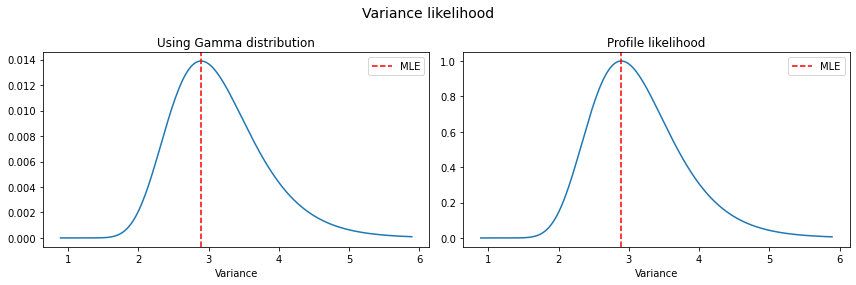

In [10]:
print('Sample variance = {:.3f}'.format(s2))

fig, axs = plt.subplots(1, 2, figsize=(12, 4), tight_layout=True)
fig.suptitle('Variance likelihood', fontsize=14)

# Plotting the variance likelihood using the Gamma distribution
ax0 = axs[0]
n = sample.shape[0]
shape = (n-1) / 2.
var_vals = np.linspace(s2-2, s2+3, 200)
pdf = gamma.pdf((n-1)*s2, a=shape, scale=2*var_vals)
ax0.plot(var_vals, pdf)
ax0.axvline(x=s2, color='red', linestyle='--', label='MLE')
ax0.set_title('Using Gamma distribution')
ax0.set_xlabel('Variance')
ax0.legend()

# Plotting the profile likelihood
ax1 = axs[1]

y = np.zeros(200)
for i, var in enumerate(var_vals):
    y[i] = L_gauss(sample, x_bar, var)

y = y / y.max()
ax1.plot(var_vals, y)
ax1.axvline(x=s2, color='red', linestyle='--', label='MLE')
ax1.set_xlabel('Variance')
ax1.set_title('Profile likelihood')
ax1.legend()

plt.show()